# **Heart Disease Detection**

---

The dataset is acuired from https://archive.ics.uci.edu/dataset/45/heart+disease. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database and will be used in this notebook

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Data Inspection

In [2]:
# the names will be the names of each column in  pandas DataFrame
names = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'class']

 # read the csv
cleveland=pd.read_csv("processed.cleveland.data", names=names)

**Overview of dataset**

Each of the 14 attributes:
  - age: Age in years
  - sex: Sex(1= male, 0= female)
  - cp: Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value3: non-aginal pain, Value 4: asymptomatic)
  - trestbps: Resting blood pressure (in mmHg on admission to the hospital)
  - chol: Serum Cholestoral in mg/dl
  - fbs: fast blood sugar > 120 mg/dl (1= true, 0=false)
  - restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or St elevation or depression of > 0.05mV, 2: showing probabal or definite left ventricular hypertrophy by Estes'criteria)
  - thalach: Maximum heart rate achieved
  - exang: Excercise included angina (1= yes, 0=no)
  - oldpeak: ST depression induced by exercise relative to rest
  - slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
  - ca : Number of major vessels (0-3) colored by flourosopy
  - thal: 3= normal, 6= fixed defect, 7= reversable defect
  - Class: Diagnosis of heart disease- angiprahic disease status (Value 0: <50% diameter narrowing, Value 1: > 50% diameter narrowing) in any major vessel: attributes 59 through 68 are vessels

So there are 303 entries with the 14 above columns.

In [3]:
print(cleveland.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  class     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [4]:
print(cleveland.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope       class  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

#**Discussion of output**
The dataset contains patients primarily in their 50s, with a higher proportion of men. A majority of patients exhibit elevated cholesterol levels and resting blood pressure, two important risk factors for heart disease.
Many patients show abnormal electrocardiographic results and exercise-induced angina, both of which are key indicators of heart disease.
The target variable indicates that a significant proportion of patients have been diagnosed with heart disease.

In [5]:
print(cleveland.head())



    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  class  
0    3.0  0.0  6.0      0  
1    2.0  3.0  3.0      2  
2    2.0  2.0  7.0      1  
3    3.0  0.0  3.0      0  
4    1.0  0.0  3.0      0  


#Exploratory Analysis


In [49]:
import re
symbols = r"[!@#$%^&*()_+={}|\[\]\\:;\"'<>?,./]"

for col in cleveland.columns:
    if cleveland[col].dtype == 'object':
        if cleveland[col].str.contains(symbols).any():
            print(f"Column '{col}' contains symbols: {cleveland[col][cleveland[col].str.contains(symbols).fillna(False)].unique()}")

Column 'ca' contains symbols: ['0.0' '3.0' '2.0' '1.0' '?']
Column 'thal' contains symbols: ['6.0' '3.0' '7.0' '?']


#**Discussion of output**
There are two fetures ca and thal that even though it is said that they have numeric values, they have datatypes of objects. That is an indicator that they may contain different than the expected values. So  the above code confirms that they contain the symbolo '?' so there are missing values.

In [8]:
#print the data of the last patietns
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


In [9]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0


**explanation of code**

The values for ca in entry 287 and 302 have value '?', this needs to be corrected. The DataFrame will be filtered in order to remove rows that contain the value '?'.

`~cleveland.isin(['?'])` returns a DataFrame where '?' values are replaced by False, and all other values are marked True.
When this mask is applied to the DataFrame `(cleveland[~cleveland.isin(['?'])])`, it will leave the other elements intact but turn the cells containing '?' into NaN because pandas cannot store strings and boolean masks simultaneously in a DataFrame.
Then these will be removed from the df.

In [10]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
class       0
dtype: int64


This line of code prints the sum of null (missing) values for each column in the DataFrame

In [11]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
280,57.0,1.0,4.0,110.0,335.0,0.0,0.0,143.0,1.0,3.0,2.0,1.0,7.0,2
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
283,35.0,1.0,2.0,122.0,192.0,0.0,0.0,174.0,0.0,0.0,1.0,0.0,3.0,0
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0,2
285,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,4
286,58.0,0.0,4.0,170.0,225.0,1.0,2.0,146.0,1.0,2.8,2.0,2.0,6.0,2
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
290,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,1


In [12]:
print(data.shape)

(297, 14)


In [13]:
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64


In [14]:
# convert all objects into numeric values
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#**Discussion of outputs**
So now there are 297 entries since those with NaN values derived from missing values, are removed. But also the datatypes of the features aren't all numeric, leading to one more necessary change to be made.  After that, the dataset still shows a strong male bias, with 68% of the patients being male.Cholesterol, blood pressure, and ECG abnormalities remain prominent risk factors, with a wide range in heart rate and cholesterol levels.The target variable indicates that a significant portion of the patients have some degree of heart disease.

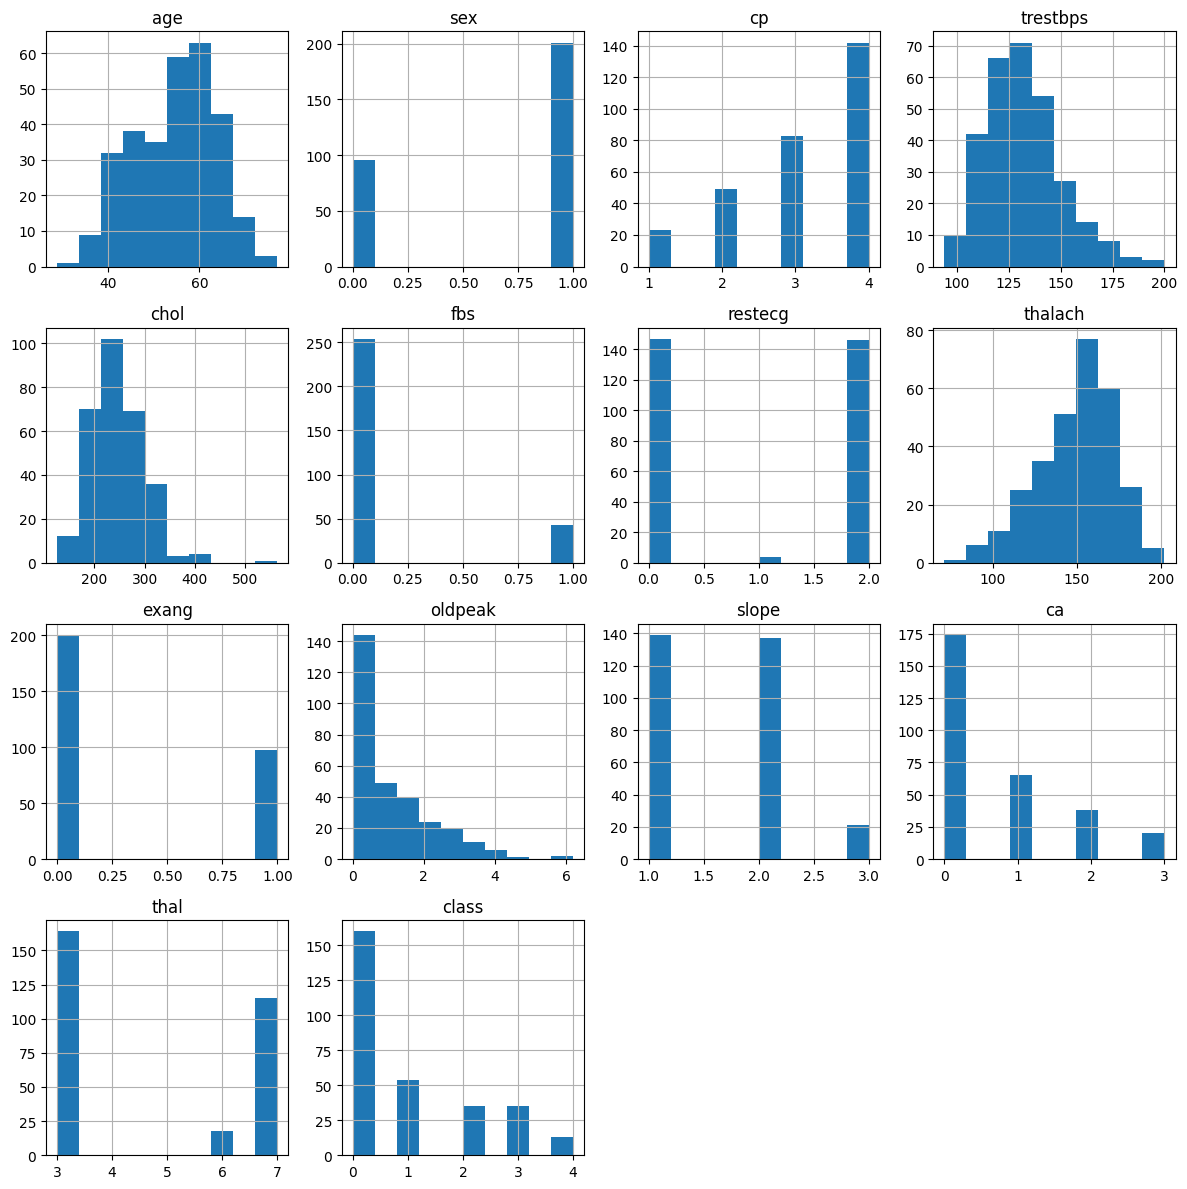

In [16]:
data.hist(figsize = (12, 12))
plt.tight_layout()
plt.show()


#**Discussion of outputs**
from the above histogramm these informations are taken
1. Age:
The distribution is somewhat bell-shaped, with the majority of patients falling in the 50-60 year range. The dataset contains fewer younger and older individuals.
2. Sex:
The distribution is heavily skewed toward males (1 = male, 0 = female), indicating that most patients in the dataset are male.
3. Chest Pain Type (cp):
Most patients have asymptomatic chest pain (cp = 4), followed by non-anginal pain (cp = 3).
4. Resting Blood Pressure (trestbps):
The resting blood pressure is concentrated between 110 and 140 mmHg, with a slight skew toward higher blood pressure levels.
5. Cholesterol (chol):
The distribution of cholesterol levels is roughly normal, with most values between 200 and 300 mg/dL. There are some outliers with much higher cholesterol levels.
6. Fasting Blood Sugar (fbs):
This binary variable shows that most patients have a fasting blood sugar less than 120 mg/dL (0), with fewer having elevated levels (1).
7. Resting Electrocardiographic Results (restecg):
The majority of patients either have normal ECG results (restecg = 0) or ST-T wave abnormalities (restecg = 1). Very few patients have left ventricular hypertrophy (restecg = 2).
8. Maximum Heart Rate Achieved (thalach):
The heart rate distribution is roughly normal, centered around 140 to 160 beats per minute, with fewer patients achieving very low or very high heart rates.
9. Exercise Induced Angina (exang):
Most patients do not experience exercise-induced angina (0), while a smaller portion does (1).
10. ST Depression (oldpeak):
These values are mostly concentrated near 0, with a long tail extending to higher values, indicating that most patients experience low levels of ST depression during exercise.
11. Slope of the Peak Exercise ST Segment (slope):
The slope is divided mainly between upsloping (slope = 1) and flat (slope = 2). Very few patients have a downsloping ST segment (slope = 3).
12. Number of Major Vessels Colored by Fluoroscopy (ca):
Most patients have 0 major vessels colored by fluoroscopy.
13. Thalassemia (thal):
Most patients either have a normal blood flow (thal = 3) or a reversible defect (thal = 7).
14. Class (Target):
The target variable is somewhat imbalanced, with the majority of patients falling into class 0 (no significant heart disease). There is a lower number of patients with more severe heart disease (class 1-4).


There is an imbalance in gender, with more male patients than female patients.
Many patients do not have exercise-induced angina, but a significant portion experiences asymptomatic chest pain. Most patients have normal or slightly elevated resting blood pressure, cholesterol, and fasting blood sugar levels, with a few **outliers** showing higher values. The target class is skewed towards class 0, indicating that most patients do not have significant heart disease.

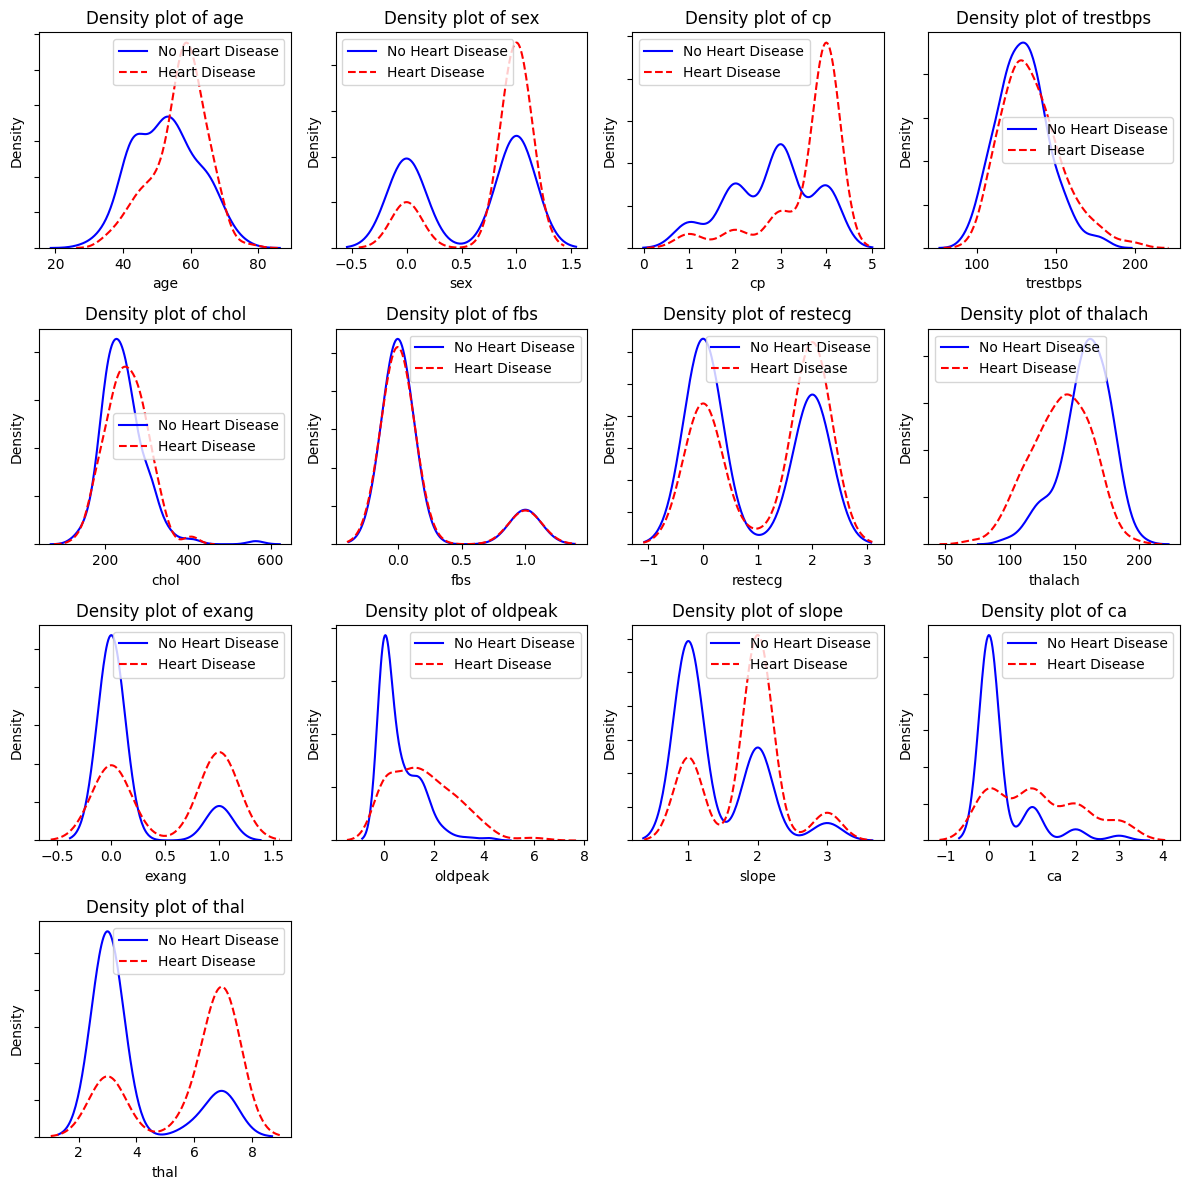

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns except 'class' (target)

numeric_columns = ['age',  'sex','cp','trestbps', 'chol','fbs','restecg', 'thalach','exang', 'oldpeak',  'slope','ca','thal']

# Create a 3x2 subplot to fit all density plots
plt.subplots(4, 4, figsize=(12, 12))

# Plot a density plot for each numerical variable
for idx, col in enumerate(numeric_columns):
    ax = plt.subplot(4, 4, idx + 1)
    ax.yaxis.set_ticklabels([])  # Remove y-axis tick labels for cleaner look

    # Plot for patients with no heart disease (class = 0)
    sns.kdeplot(data.loc[data['class'] == 0][col],
                ax=ax, linestyle='-', color='blue', label="No Heart Disease", warn_singular=False)

    # Plot for patients with heart disease (class > 0)
    sns.kdeplot(data.loc[data['class'] > 0][col],
                ax=ax, linestyle='--', color='red', label="Heart Disease", warn_singular=False)

    ax.set_title(f'Density plot of {col}')
    ax.legend()

plt.subplot(4,4,14).set_visible(False)
plt.subplot(4,4,15).set_visible(False)
plt.subplot(4,4,16).set_visible(False)

plt.tight_layout()
plt.show()


**explanation of code**

- `numeric_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']`
This creates a list of the numeric columns.The class column (target variable) is excluded since it's categorical (not appropriate for KDE plots).
- `plt.subplots(4, 4, figsize=(12, 12))`: Creates a figure with a grid of 4 rows and 4 columns of subplots (axes).The overall size of the figure is set to 12x12 inches.
- `enumerate(numeric_columns)`: This loops through each column (numeric feature) and also keeps track of the index idx (starting from 0).
`ax = plt.subplot(4, 4, idx + 1):` For each feature, a subplot is created in the 4x4 grid using idx + 1 to position the subplot correctly. `ax.yaxis.set_ticklabels([]):` This line removes the y-axis tick labels for a cleaner look.
- `data.loc[data['class'] == 0][col]:` Filters the data to select rows where the class is 0 (patients with no heart disease) and then selects the column col. This is passed to the sns.kdeplot() function to generate the KDE plot for those patients.

 - `sns.kdeplot():` Plots the density curve for the selected feature:

 - ` ax=ax: `Specifies which subplot to plot the KDE on.
 - `linestyle='-':` Uses a solid line to represent patients without heart disease.
 - `color='blue':` Sets the line color to blue.
 - `label="No Heart Disease":` Adds a label to the plot for the legend.

- `ax.set_title():` Adds a title to each subplot. The title will include the name of the feature being plotted (e.g., "Density plot of age").
`ax.legend():` Adds a legend to each subplot to differentiate between the two KDE curves (no heart disease and heart disease).
Hide Empty Subplots:

# **Discussion of output**
The density plots are useful for identifying which features could be important for predicting heart disease, and  can be used  for feature selection or further model tuning.
- Sex, cp (chest pain type), thalach (maximum heart rate achieved), exang (exercise-induced angina), oldpeak (ST depression), slope of ST segment, ca (number of major vessels), and thal show clear distinctions between patients with and without heart disease.**
These features are likely strong indicators or predictors for heart disease.


- Trestbps (resting blood pressure), chol (cholesterol), and fbs (fasting blood sugar) show significant overlap between the two groups, meaning these features might not be as strong at distinguishing heart disease from no heart disease in this dataset.



---
---

x(scaled) = (x-mean)/sd

Mean = 0

standard deviation = 1




*   Value > mean will have +z score
*   Value < mean will have -z score



In [19]:
Xcol = pd.DataFrame(data.iloc[:, 0:13],columns=numeric_columns)
ycol = pd.DataFrame(data.iloc[:, 13],columns=['HeartDisease'])
print(Xcol)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(Xcol))

XScaled = scaler.fit_transform(Xcol)

XScaled = pd.DataFrame(XScaled,columns=numeric_columns)
print(XScaled)
print('Summary')
summary = XScaled.describe()
print(summary)
summary = summary.transpose()
print(summary)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1  

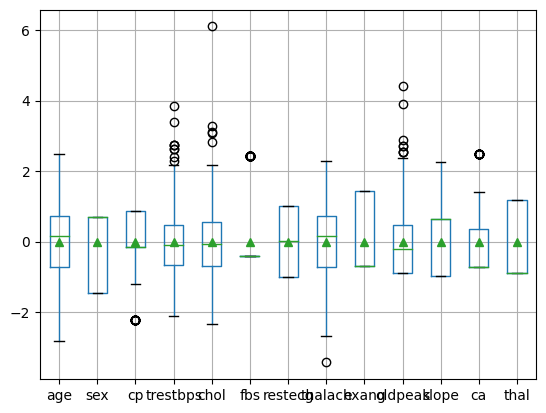

In [20]:
import matplotlib.pyplot as plt
boxplot = XScaled.boxplot(column=numeric_columns,showmeans=True)
plt.show()

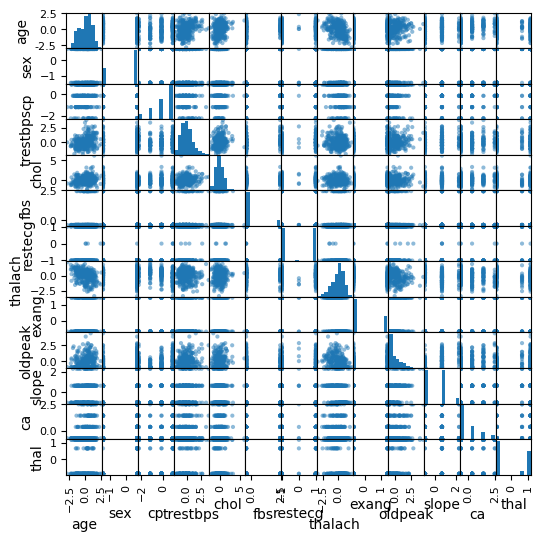

In [21]:
pd.plotting.scatter_matrix(XScaled, figsize=(6, 6))
plt.show()

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

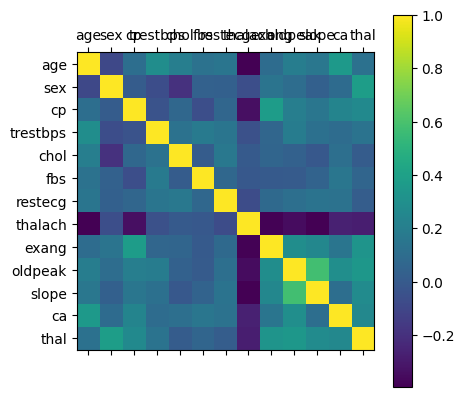

In [22]:
CorData = XScaled.corr(method='pearson')

with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

In [23]:
#X1 = data.drop('class', axis=1)
#print(X1)
#y1=data['class']
#print(y1)

In [24]:
#x1 = data.loc[:, data.columns != 'class']
#y1 = data.loc[:, 'class']
#print(x1)
#print(y1)

X = data.drop('class', axis=1) # Features (excluding the target variable)
y = data['class']

---
---

---

you are converting the pandas DataFrame (data.drop(['class'], axis=1)) and pandas Series (data['class']) into NumPy arrays (X and y, respectively).

Here’s what happens in detail:

1. X = np.array(data.drop(['class'], axis=1))
data.drop(['class'], axis=1):

This removes the 'class' column from the data DataFrame.
The remaining columns (all feature columns) are kept in the resulting DataFrame.
axis=1 means you are dropping a column (not a row).
np.array():

Converts the resulting DataFrame (which contains all feature columns except class) into a NumPy array.
NumPy arrays do not retain column names, so X will just contain the data without any header or column names.
2. y = np.array(data['class'])
data['class']:

This extracts the class column from the data DataFrame as a pandas Series.
np.array():

Converts the Series into a NumPy array, which also does not retain the column name (class).
y will be a 1D array containing the target values (i.e., the class labels).
Summary of What Happens:
X (Features):

X will be a 2D NumPy array with shape (n_samples, n_features) where:
n_samples is the number of rows in your original DataFrame (each row is an example).
n_features is the number of columns excluding the class column (each column is a feature).
There will be no column names or index information retained.
y (Target):

y will be a 1D NumPy array with shape (n_samples,), where:
n_samples is the number of rows in your original DataFrame.
This array will only contain the target values (i.e., the class labels), without the column name (class).
Effect of Converting to NumPy Arrays:
No column names: Once converted to NumPy arrays, X and y lose the column names and index information. They are now just arrays of data.
Why Use NumPy: NumPy arrays are commonly used in machine learning models (e.g., in libraries like scikit-learn, Keras, and TensorFlow). These models typically do not need or use the column names; they only operate on the data itself.
Example:
Suppose your data DataFrame looks like this:

age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	class
63	1	3	145	233	1	0	150	0	2.3	0	0	1	0
37	1	2	130	250	0	1	187	0	3.5	0	0	2	1
...	...	..	...	...	...	...	...	...	...	...	...	...	...
After running the conversion:

python
Αντιγραφή κώδικα
X = np.array(data.drop(['class'], axis=1))
y = np.array(data['class'])
X will look like:
python
Αντιγραφή κώδικα
array([[63.0, 1.0, 3.0, 145.0, 233.0, 1.0, 0.0, 150.0, 0.0, 2.3, 0.0, 0.0, 1.0],
       [37.0, 1.0, 2.0, 130.0, 250.0, 0.0, 1.0, 187.0, 0.0, 3.5, 0.0, 0.0, 2.0],
       ...])
No column names or index.
Each row represents a patient, and each column represents a feature.
y will look like:
python
Αντιγραφή κώδικα
array([0, 1, ...])
A 1D array containing the class labels for each patient.
Next Steps:
Once you have X and y, you can use them directly as inputs for machine learning models, for example:

python
Αντιγραφή κώδικα
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)
This workflow is typical when preparing data for machine learning.

---

#**Training-Testing**

In [25]:
# create X and Y datasets for training
from sklearn.model_selection import train_test_split

X = np.array(data.drop(['class'], axis=1))
y = np.array(data['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

#one hot encoding?????

**1.Categorical Classification**
Categorical classification refers to the process of predicting a target variable that can take two or more discrete categories (here class). The task of the model is to assign a given input to one of the possible multiple categories.

Key Characteristics:
The target variable is categorical, meaning it consists of discrete labels (not continuous). Each input is assigned to one of multiple classes.


In the Cleveland dataset, predicting the severity of heart disease (class variable) is a categorical classification problem because the target variable can take one of five classes: 0, 1, 2, 3, or 4.

**2. Binary Classification**
Binary classification is a specific case of categorical classification where the target variable can take only two possible classes. The task of the model is to classify the input as belonging to one of two categories.

Key Characteristics:
The target variable has only two distinct classes (binary). The model predicts the probability of an input belonging to one class or the other. The classes are often labeled as 0 and 1, True and False, or any other pair of binary labels.

In the Cleveland heart disease dataset  the class variable is converte to binary, where:

0 = no heart disease

1 = any value greater than 0 (indicating some form of heart disease),

Then this becomes a binary classification problem, where the goal is to predict whether a patient has heart disease or not.


In [27]:
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(237, 5)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


**Explanation of code**

`to_categorical()`: This function is from the Keras library (keras.utils) and is specifically designed for one-hot encoding.
It takes two main arguments:
The first argument (y_train or y_test) is the categorical data  to be encoded,  the target variable representing the class of heart disease (0-4).
The second argument (num_classes) specifies the total number of categories. When set to None, it automatically infers the number of categories from the input data.


One-hot encoding creates a new binary column for each category. Each row will have a '1' in the column corresponding to its category and '0' in all other columns.

#**Discussion of output**

The above code is using **One-hot encoding** on  target variables (y_train and y_test). One-hot encoding is a process of converting categorical data into a numerical format that can be used by machine learning algorithms, especially for multi-class classification problems.

What happens is that the original variable class can have values [0,1,2,3,4] and these will be transformed into:

[[1, 0, 0, 0, 0],  # Represents category 0

 [0, 1, 0, 0, 0],  # Represents category 1

 [0, 0, 1, 0, 0],  # Represents category 2

  [0, 0, 0, 1, 0], # Represents category 3

 [0, 0, 0, 0, 1]]  # Represents category 4



In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 173 (692.00 B)

 Trainable params: 173 (692.00 B)

 Non-trainable params: 0 (0.00 B)

None


**Explanation of code**

**Sequential**: This is the most common Keras model type, where layers are stacked sequentially (one after another). It's useful when your model has a simple structure where each layer has exactly one input and one output.

**Dense**: This is a fully connected (or dense) layer in a neural network. In a dense layer, each neuron in the layer is connected to every neuron in the previous and next layers.

**Adam**: Adam (Adaptive Moment Estimation) is an optimizer used to update the weights of the network during training. It’s a popular choice because it combines the advantages of both AdaGrad and RMSProp optimizers.

First  a function `create_model()`  is defined that returns a Keras Sequential model. This model will be built by stacking multiple layers in sequence.

Then follows the **Input  and first hidden Layer** with
 - `Dense(8)`: This defines a dense layer with 8 neurons.

 - `input_dim=13`: This specifies that the input layer will receive 13 features (i.e., the model expects the input data to have 13 features). This is important because it tells the network how many inputs it should expect.

 - `kernel_initializer='normal'`: This specifies how the initial weights of the neurons should be set. 'normal' means the weights will be initialized with random values drawn from a Gaussian distribution (normal distribution).

 - `activation='relu'`: ReLU (Rectified Linear Unit) is the activation function for this layer. ReLU is a common choice for hidden layers because it helps the model learn non-linear patterns and speeds up training by allowing faster convergence.

For the **second hidden Layer** also a Dense layer is used with 4 neurons and same features as before.
Finally in the **Output Layer** is also used a Dense layer with 5 neurons(as many as the values of class). Softmax is used as the activation function, because it outputs a probability distribution over the 5 classes. Each neuron will output a value between 0 and 1, and the sum of all outputs will equal 1. This is essential for multi-class classification tasks.

For compiling the model:

`Adam(learning_rate=0.001)`: Here, the Adam optimizer is created with a learning rate of 0.001. The learning rate controls how quickly the model adapts to the data by updating its weights after each step of the optimization.

`loss='categorical_crossentropy'`: This specifies the loss function. Since this is a multi-class classification problem, categorical cross-entropy is used and the target labels are one-hot encoded. Cross-entropy calculates how far the predicted probability distribution is from the actual distribution (true labels).

`metrics=['accuracy']`: This tells Keras to track accuracy during training. The accuracy is the percentage of correctly classified examples out of all predictions.

Finally the `create_model()` function is called to instantiate the model. This model can now be trained, evaluated, and used for predictions.



#**Discussion of output**

From the summary of the model it is clear that there are 3 layers, the first with 8 neurons, second with 4 and the last with 5. The first layer has 13 input features and each of the 8 neurons has a weight for each input, plus one bias term for each neuron so its parameters are 118, the second layer takes the 8 outputs from the previous layer and outputs 4 values (neurons) so 36 trainable parameters and Layer 3 takes the 4 outputs from the previous layer and produces 5 outputs so 25 trainable parameters. So the overall parameters used for training are 173.

The more parameters the model has, the more capacity it has to learn complex patterns from the data. However, too many parameters can lead to overfitting (where the model learns the training data too well but performs poorly on unseen data).

In [29]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0463 - loss: 2.6275    
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 1.5942 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5616 - loss: 1.5844 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6190 - loss: 1.5671 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 1.5577 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5977 - loss: 1.5416 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6058 - loss: 1.5286 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5764 - loss: 1.5221
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5353 - loss: 1.5198
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5279 - loss: 1.5150 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5712 - loss: 1.4886
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

**Explanation of code**


`model.fit()`: This is the training function in Keras, used to train the neural network on the training data (X_train and Y_train). During the training process, the model adjusts its weights and biases based on the loss and optimization function.

`epochs=100` means the model will go through the entire training dataset 100 times, updating the weights each time.

`batch_size=10`In this case, the model will process 10 samples at a time (mini-batches) and update the weights after each mini-batch.
If  240 samples in total, this means that for each epoch, the model will process the data in 24 mini-batches (240 samples / 10 = 24 batches).

`verbose=1` Setting verbose=1 means there will be detailed output for each epoch, including the loss and accuracy after each step of training.

#**Discussion of output**

After the first epoch, the model's accuracy on the training data is 4.63%. This is low because it's the first epoch, and the model hasn't yet learned much from the data. The loss after the first epoch is 2.6275. Loss is a measure of how well the model is performing, and a higher loss indicates worse performance. The model's goal is to minimize the loss during training.  The accuracy increases to 54.99% by the final epoch. The loss decreases to 1.2696. This shows that the model is learning, but it's still far from perfect.

---

In [30]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1
print(Y_train_binary[:20])

[0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0]


**Explanation of code**


`.copy()`  This command creates a new array called  that is a copy of the original data. This is done to avoid modifying the original data both for Y_train and Y_test.

Then all elements that are greater than 0 are assigned with boolean indexing in value 1. So if in the original set there these values [0, 2, 1, 0, 4, 3] now will be transformed in [0,1,1,0,1,1]

**The point is to simplify the problem to a binary classification task (presence or absence of heart disease) instead of the original multi-class problem.
Binary classification can be easier to model and might be sufficient for some applications.**




In [31]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [32]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4790 - loss: 0.7805
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6537 - loss: 0.6792 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 0.6863 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - loss: 0.6564 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.6407 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.6324  
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6737 - loss: 0.5914 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.5968 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7108 - loss: 0.5717 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7229 - loss: 0.5097 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.5243 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

#**Discussion of output**

The logic behind the binary model is the same as with categorical. there are 3 dense layers, with 8,4,1 neurons respectively and the corresponding parameters are 112,36,5.

After the first epoch, the model's accuracy is 47.90%. This is expected to be low at first since the model is just starting to learn.By the final epoch, the accuracy has increased to 88.90%, and the loss has decreased to 0.3271. This shows the model has improved significantly since the first epoch, with both the accuracy increasing and the loss decreasing.

---

In [33]:
from sklearn.metrics import classification_report, accuracy_score
categorical_pred=model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [34]:
categorical_pred

array([[0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.1096717 , 0.11703277, 0.05388575],
       [0.5477953 , 0.17161456, 0.

In [35]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [36]:
categorical_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.43333333333333335
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        26
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         6

    accuracy                           0.43        60
   macro avg       0.09      0.20      0.12        60
weighted avg       0.19      0.43      0.26        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [39]:
print('Results for Categorical Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Categorical Model
0.7
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        26
           1       0.75      0.71      0.73        34

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



#BINARY CLASSIFICATION WITH SCALING
---

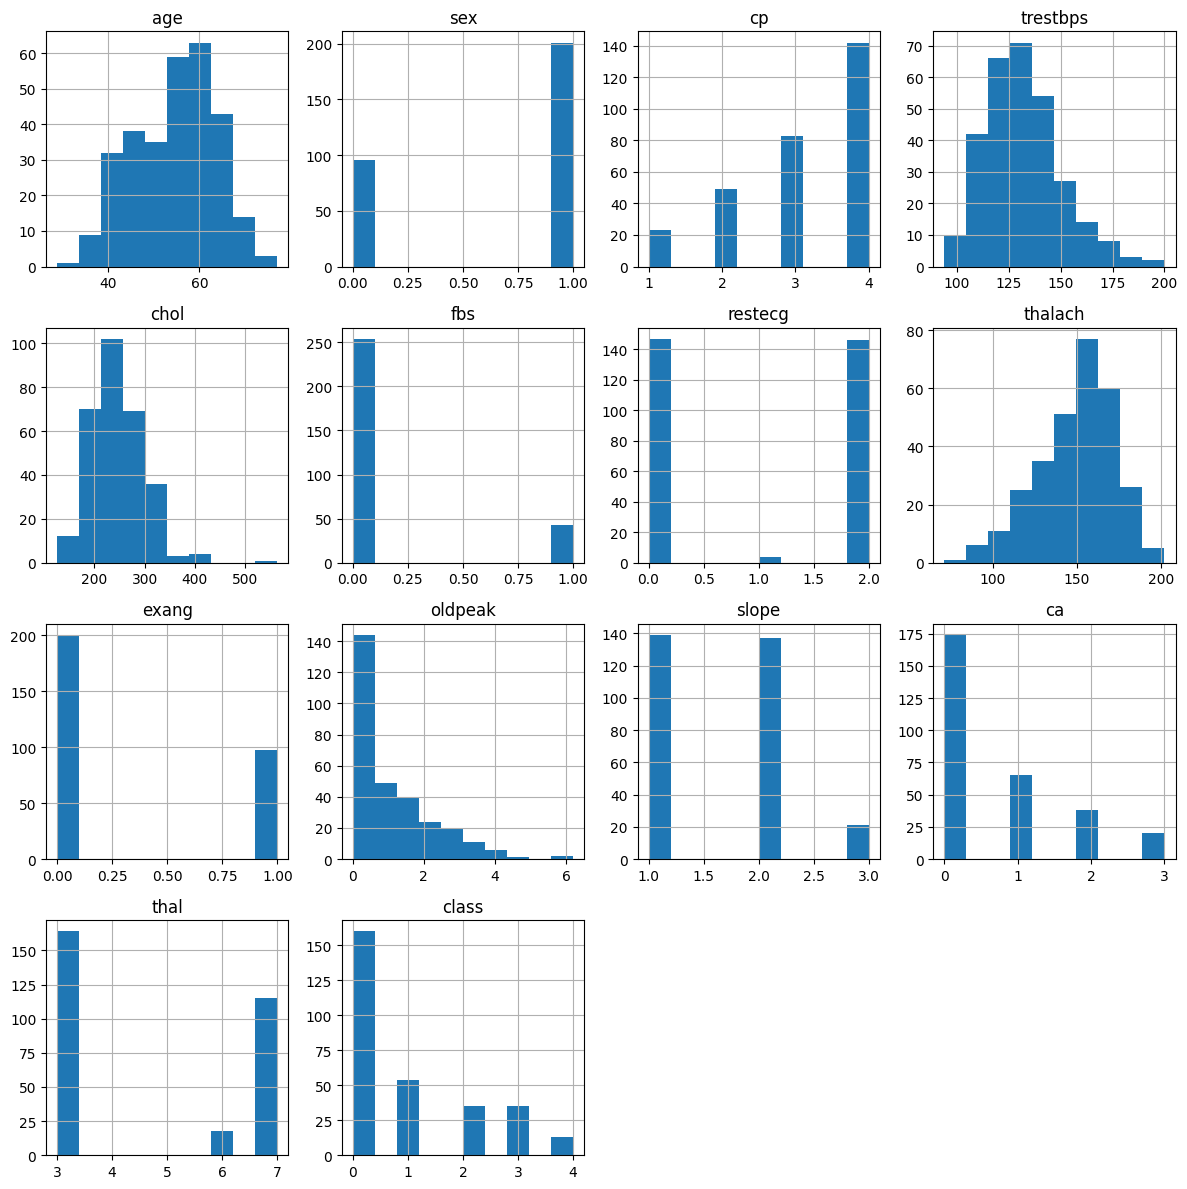

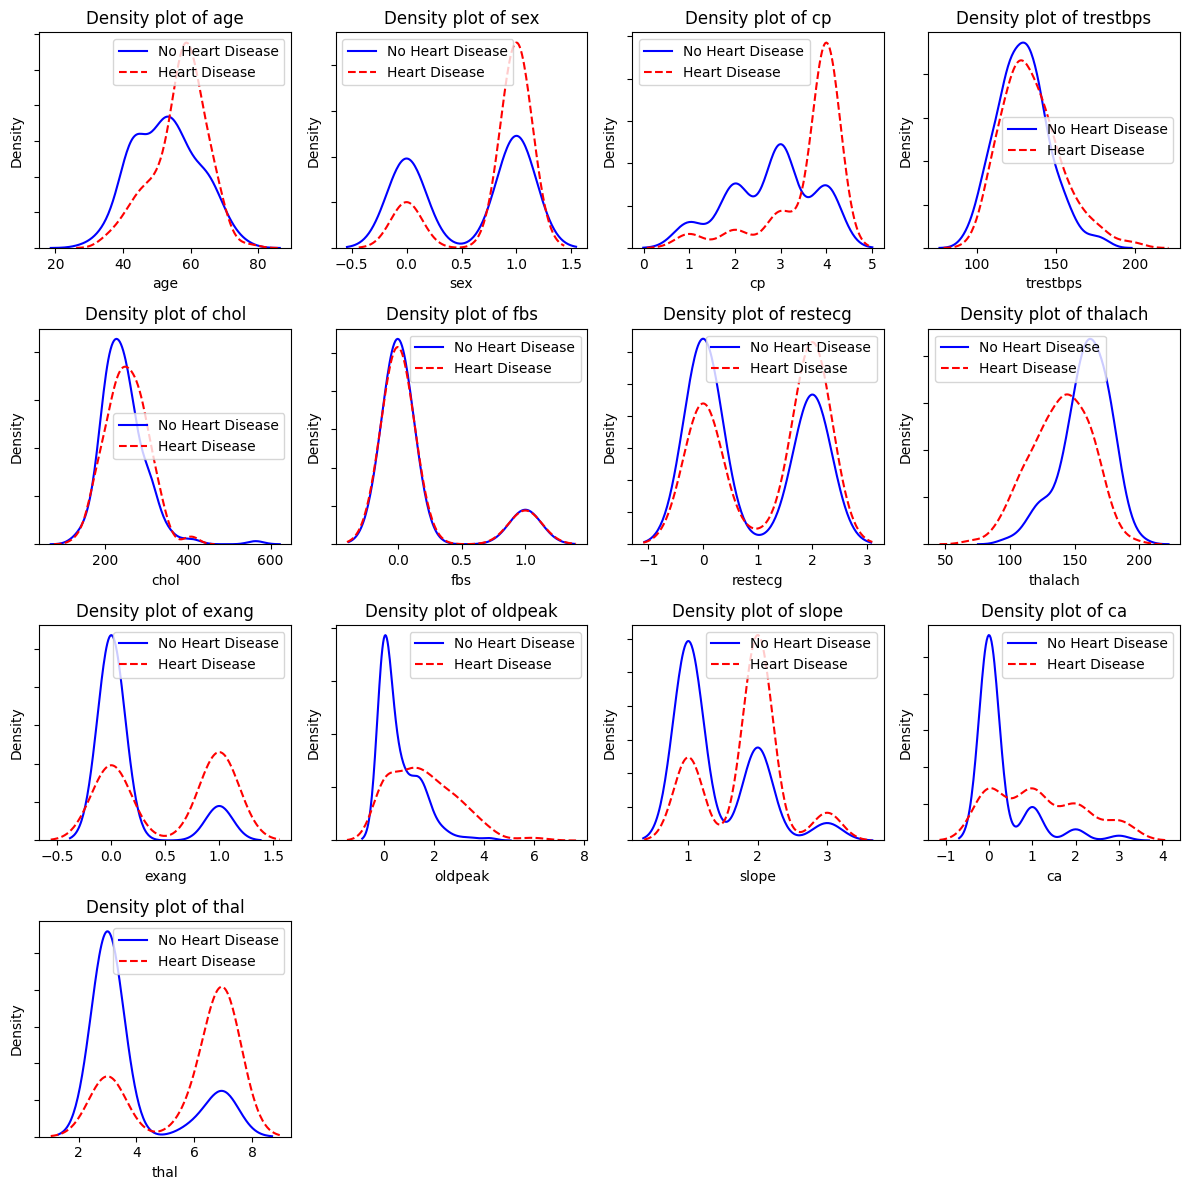

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
StandardScaler()
                age           sex            cp      trestbps          chol  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02   
mean  -1.226105e-16 -7.177199e-17 -4.037175e-17  4.904420e-16 -1.958777e-16   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00   
min   -2.827176e+00 -1.446980e+00 -2.240629e+00 -2.125634e+00 -2.337704e+00   
25%   -7.241238e-01 -1.446980e+00 -1.642895e-01 -6.594306e-01 -7.002541e-01   
50%    1.613719e-01  6.910947e-01 -1.642895e-01 -9.550637e-02 -8.380217e-02   
75%    7.148067e-01  6.910947e-01  8.738802e-01  4.684179e-01  5.519138e-01   
max    2.485798e+00  6.910947e-01  8.738802e-01  3.851964e+00  6.099981e+00   

                fbs       restecg       thalach         exang     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean

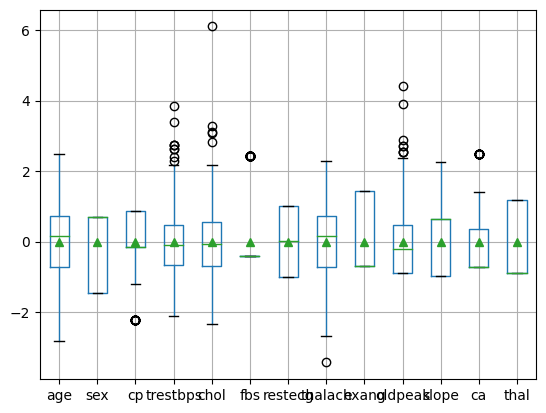

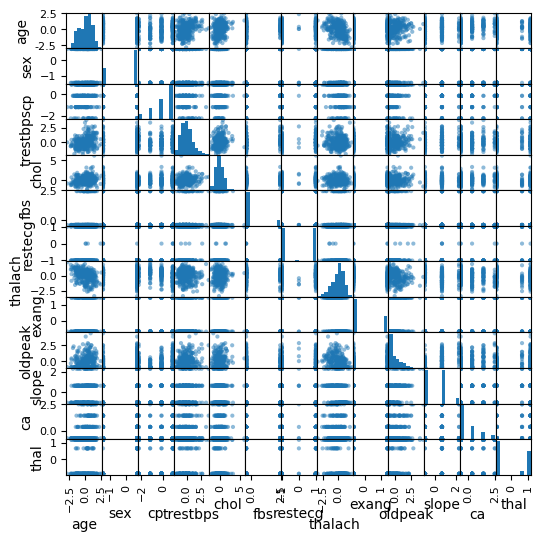

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

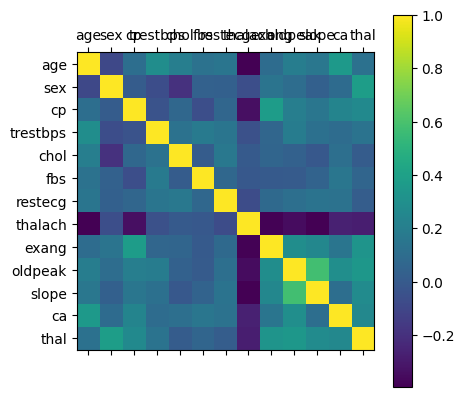

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3443 - loss: 0.7861
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4148 - loss: 0.4769 
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4349 - loss: 0.2796  
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4975 - loss: -0.0602 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5300 - loss: -0.1162 
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5587 - loss: -0.3537  
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5059 - loss: -0.6370 
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: -0.9210 
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5456 - loss: -0.9424 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5200 - loss: -1.1656 
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5324 - loss: -1.5792  
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 30)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,185 (12.45 KB)

 Trainable params: 1,061 (4.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,124 (8.30 KB)

Keras Model Acccuracy=  0.5222222208976746
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[34 11  0  0  0]
 [ 6 13  0  0  0]
 [ 1 10  0  0  0]
 [ 0 14  0  0  0]
 [ 0  1  0  0  0]]


In [40]:
names = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'class']

 # read the csv
cleveland=pd.read_csv("processed.cleveland.data", names=names)
data = cleveland[~cleveland.isin(['?'])]
data = data.dropna(axis=0)
data = data.apply(pd.to_numeric)

data.hist(figsize = (12, 12))
plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns except 'class' (target)

numeric_columns = ['age',  'sex','cp','trestbps', 'chol','fbs','restecg', 'thalach','exang', 'oldpeak',  'slope','ca','thal']

##### Create a 3x2 subplot to fit all density plots
plt.subplots(4, 4, figsize=(12, 12))

# Plot a density plot for each numerical variable
for idx, col in enumerate(numeric_columns):
    ax = plt.subplot(4, 4, idx + 1)
    ax.yaxis.set_ticklabels([])  # Remove y-axis tick labels for cleaner look

    # Plot for patients with no heart disease (class = 0)
    sns.kdeplot(data.loc[data['class'] == 0][col],
                ax=ax, linestyle='-', color='blue', label="No Heart Disease", warn_singular=False)

    # Plot for patients with heart disease (class > 0)
    sns.kdeplot(data.loc[data['class'] > 0][col],
                ax=ax, linestyle='--', color='red', label="Heart Disease", warn_singular=False)

    ax.set_title(f'Density plot of {col}')
    ax.legend()

plt.subplot(4,4,14).set_visible(False)
plt.subplot(4,4,15).set_visible(False)
plt.subplot(4,4,16).set_visible(False)

plt.tight_layout()
plt.show()
##########
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class']
InputNames = names
InputNames.pop()
print(InputNames)
Xcol = pd.DataFrame(data.iloc[:, 0:13],columns=InputNames)
ycol = pd.DataFrame(data.iloc[:, 13],columns=['HeartDisease'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(Xcol))

XScaled = scaler.fit_transform(Xcol)

XScaled = pd.DataFrame(XScaled,columns=InputNames)

summary = XScaled.describe()
print(summary)
summary = summary.transpose()
print(summary)

import matplotlib.pyplot as plt
boxplot = XScaled.boxplot(column=InputNames,showmeans=True)
plt.show()

pd.plotting.scatter_matrix(XScaled, figsize=(6, 6))
plt.show()

CorData = XScaled.corr(method='pearson')

with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.colorbar()
plt.show()

#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.30, random_state = 5)
#print(Input_train.shape)
#print(Input_test.shape)
#print(Target_train.shape)
#print(Target_test.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=13, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1000, verbose=1)
model.summary()

score = model.evaluate(X_test, y_test, verbose = 0)
print('Keras Model Acccuracy= ',score[1])
y_Classifcation = model.predict(X_test)
y_Classifcation  = (y_Classifcation >0.5)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_Classifcation))